# Exploratory Data Analysys (EDA)
## Costumer loans dataset


 **Cel Biznesowy**: Celem projektu będzie jest zbudowanie modelu predykcyjnego który na podstwie dostępnych cech będzie w stanie określić czy dana osoba dostanie  kredyt(1) czy też nie (0)

In [2]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import  Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("orig_train.csv")
df.head(60)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0000,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0000,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0000,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0000,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0000,5,...,1,1,1,0,0,0,0,0,0,0
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.0000,7,...,1,0,0,0,0,0,0,0,0,0
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0000,7,...,12,0,0,0,0,0,0,0,0,0
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.0000,4,...,2,0,0,0,0,0,0,0,0,1
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8000,20,...,1,1,1,0,0,0,0,0,0,0
9,F,34,County capital,Living with family,Post-graduate,married,3,1,2373.0000,4,...,13,0,0,0,0,0,0,0,0,0


In [4]:
len(df)

15097

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

### nie mamy w ramce żadnych braków danych

In [6]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [7]:
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**BUSINESS AGE** -  The number of years the business where the client is employed has been operational.  
**ECONOMIC SECTOR** -  The economic sector in which the client works.  
**EMPOLYEE_NO** -  The number of employees in the company where the client works.  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank    
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - Wheter the client fully repaid the loan  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG**- A binary indicator showing whether the client has been granted a loan by the bank (e.g., Yes/No, 1/0).


In [8]:
df.var()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15336\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


AGE                                1.811976e+02
HOUSEHOLD_MEMBERS                  5.773615e-01
NO_OF_DEPENDENTS                   2.431821e-01
INCOME                             3.140527e+06
WORK_SENIORITY                     3.189722e+01
BUSINESS AGE                       1.556983e+02
LENGTH_RELATIONSHIP_WITH_CLIENT    2.401933e+01
DEBIT_CARD                         2.365866e-01
CURRENT_ACCOUNT                    2.498052e-01
SAVING_ACCOUNT                     3.972983e-04
SALARY_ACCOUNT                     1.080314e-01
FOREIGN_ACCOUNT                    1.324679e-04
FINALIZED_LOAN                     1.372507e-01
DEPOSIT                            3.695832e-03
PENSION_FUNDS                      0.000000e+00
DEFAULT_FLAG                       5.395822e-02
dtype: float64

## Rozkłady zmiennych numerycznych

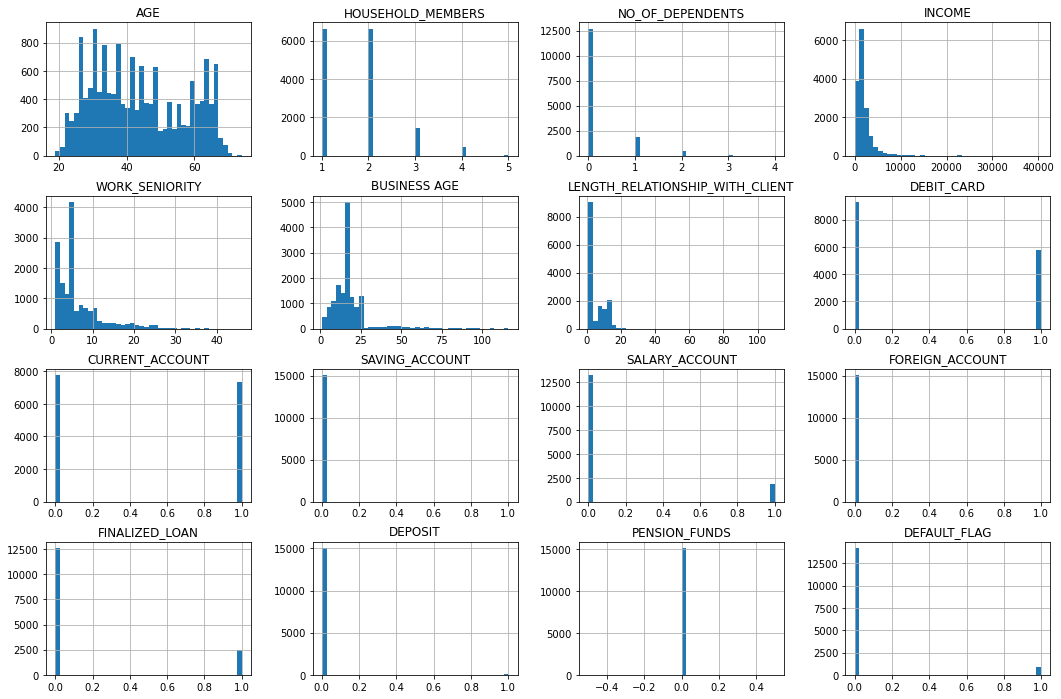

In [9]:
df.hist(bins = 40, figsize=(18, 12))
plt.show()

In [19]:
print(df['SAVING_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['DEPOSIT'].value_counts())
print('-----------------------------------')
print(df['FOREIGN_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['PENSION_FUNDS'].value_counts())

0    15091
1        6
Name: SAVING_ACCOUNT, dtype: int64
-----------------------------------
0    15041
1       56
Name: DEPOSIT, dtype: int64
-----------------------------------
0    15095
1        2
Name: FOREIGN_ACCOUNT, dtype: int64
-----------------------------------
0    15097
Name: PENSION_FUNDS, dtype: int64


### Bardzo dużo wartości 0 w kolumach SAVING_ACCOUNT, DEPOSIT, FOREIGN_ACCOUNT, PENSION_FUNDS. Rozważymy ich wyrzucenie na etapie feature engering 

## Rozkłady zmiennych kategorycznych

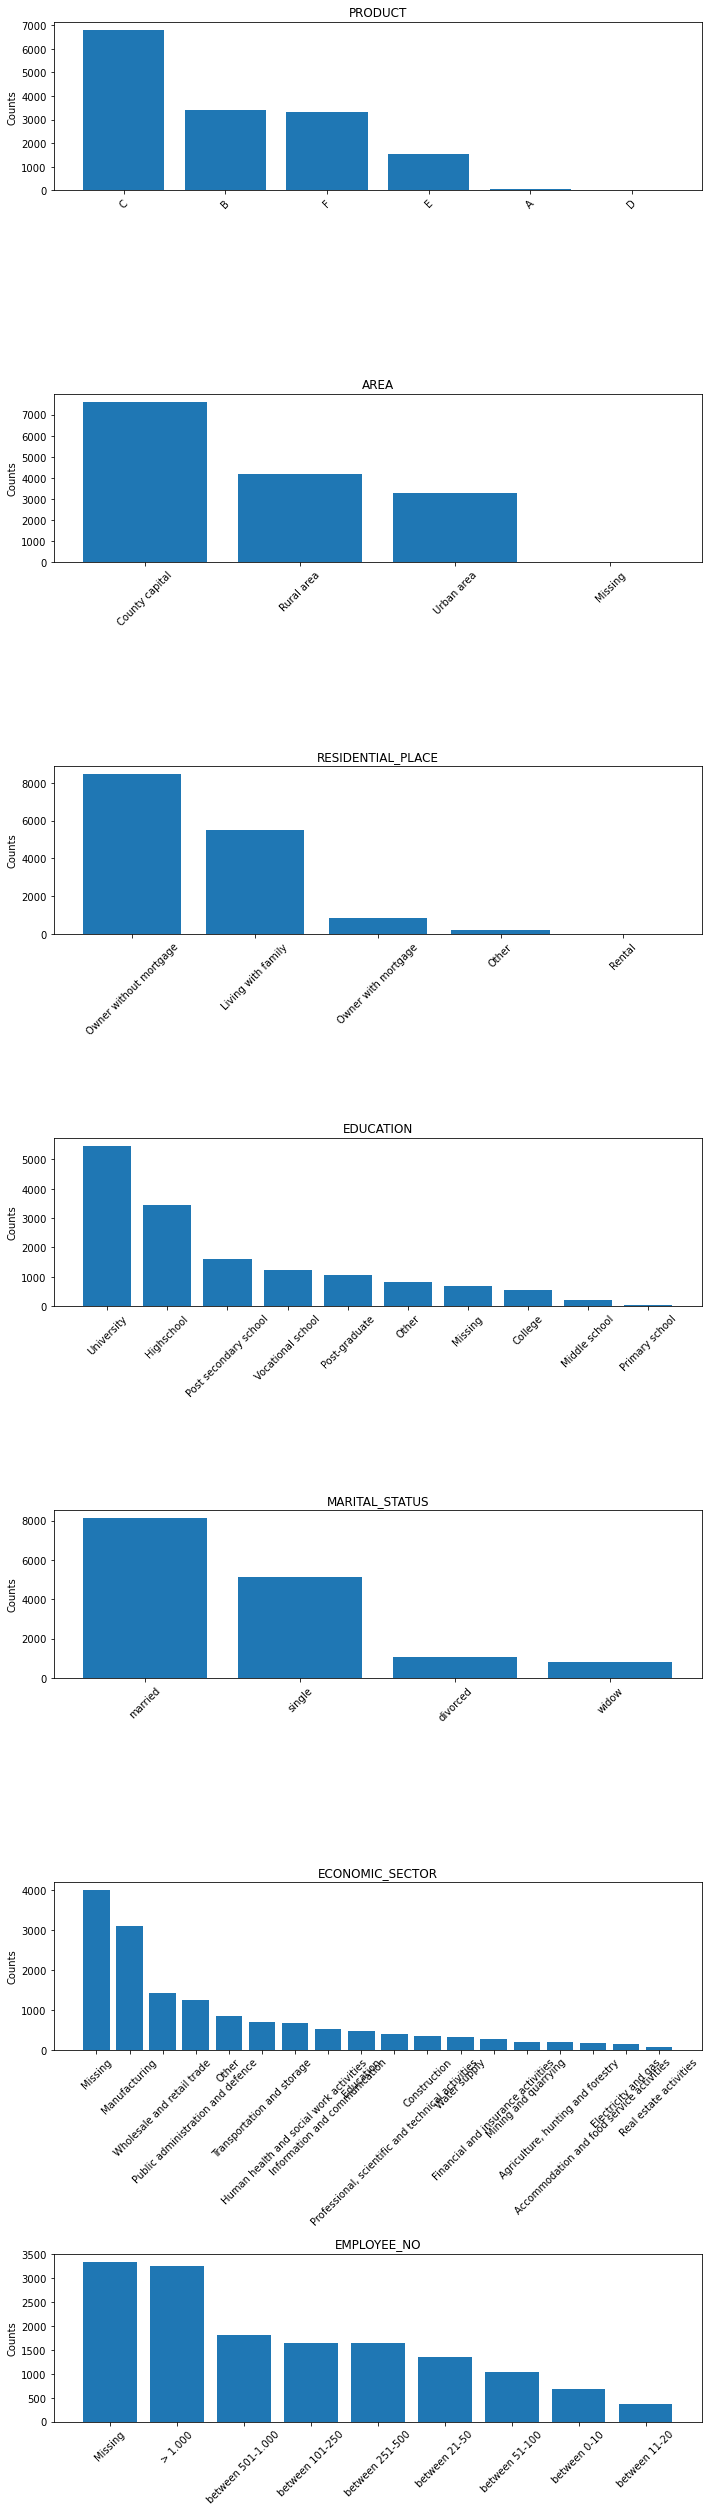

In [11]:
df_strings = df[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']]
fig, axs = plt.subplots(nrows= 7, ncols=1, figsize=(10, 7 * 5))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']):
    value_counts = df[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values)
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

### w kolumach 'AREA' 'EDUCATION' 'ECONOMIC_SECTOR' , 'EMPOLYEE_NO'  mamy wartości 'missing', z czego w kolumnie 'AREA' jest ich bradzo mało, natomiast w pozostałych kolumach jest ich znaczy odestek, być może wynika to z tego, że dana  osoba już nie pracuje, bądź nie uczy/uczyła się

### zobaczmy jak braki w  kolumnach economic_sector i empolyee_no zależą od wieku

Text(0, 0.5, 'COUNT')

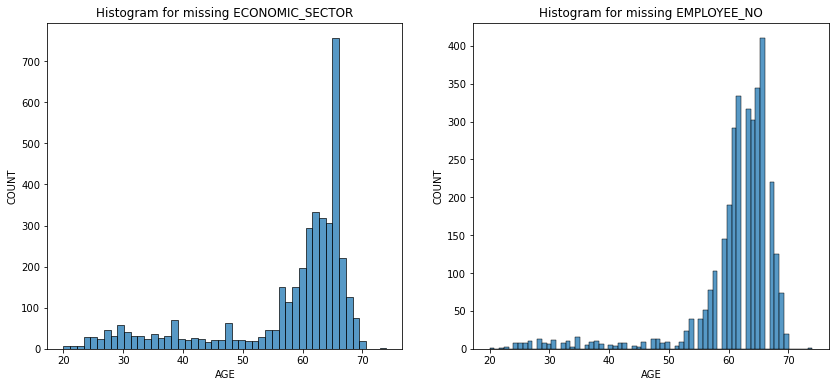

In [12]:
df_economic_missing = df[df['ECONOMIC_SECTOR']=='Missing']
df_employeen_missing=df[df['EMPLOYEE_NO']=='Missing']
fig, axs =plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=df_economic_missing, x='AGE', ax=axs[0])
axs[0].set_title('Histogram for missing ECONOMIC_SECTOR')
axs[0].set_xlabel('AGE')
axs[0].set_ylabel('COUNT')
sns.histplot(data=df_employeen_missing, x='AGE', ax=axs[1])
axs[1].set_title('Histogram for missing EMPLOYEE_NO')
axs[1].set_xlabel('AGE')
axs[1].set_ylabel('COUNT')

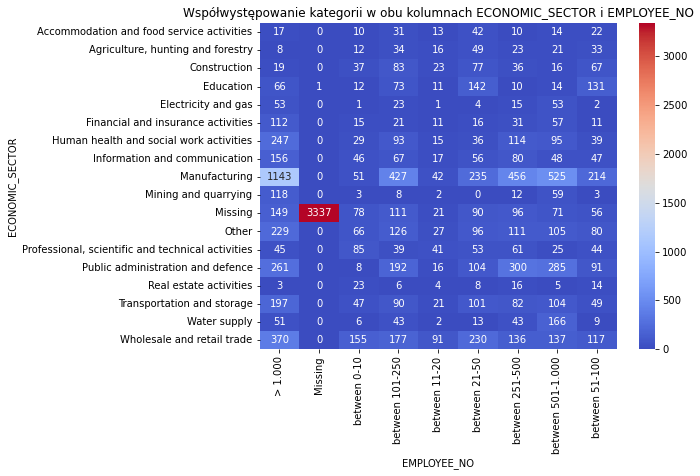

In [13]:
cross_tab = pd.crosstab(df['ECONOMIC_SECTOR'], df['EMPLOYEE_NO'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Współwystępowanie kategorii w obu kolumnach ECONOMIC_SECTOR i EMPLOYEE_NO')
plt.ylabel('ECONOMIC_SECTOR')
plt.xlabel('EMPLOYEE_NO')
plt.show()

### jak widzimy  występowanie wartości 'Missing' w kolumnie EMPLOYEE_NO jest zależne od występowania 'Missing' w kolumnie ECONOMIC_SECTOR, ponadto jak widać na histogramach, wartości te występują głównie dla osób 60+, wnioskujemy z tego, że to wartości 'missing' wynikają z tego, że dana osoba jest emerytem. 

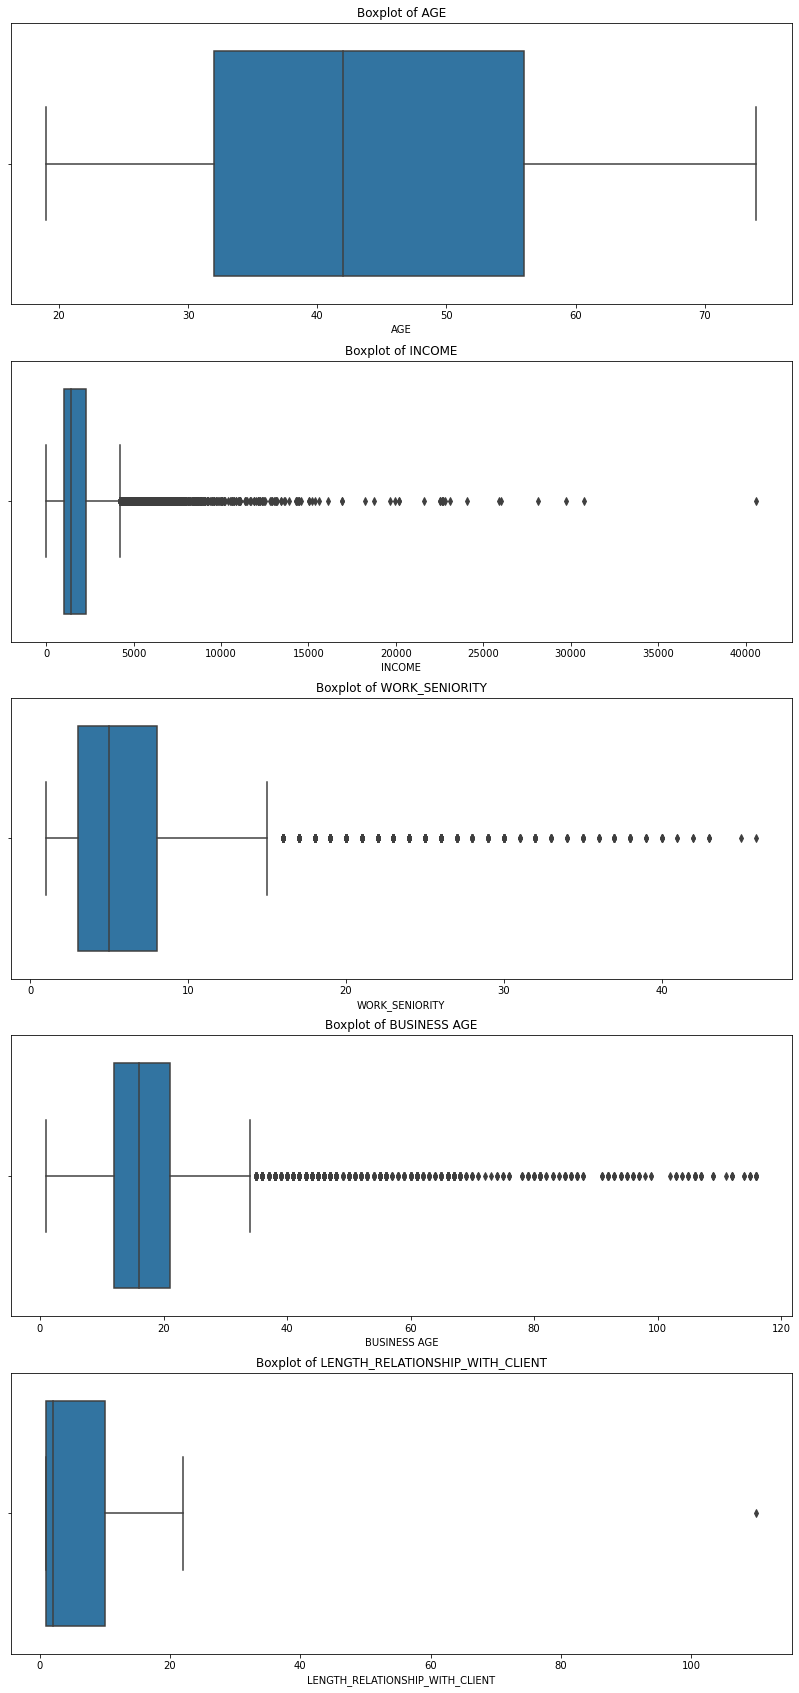

In [18]:
df_numerical = df.loc[:, ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']]
fig, axs = plt.subplots(len(df_numerical.columns), 1, figsize=(14, 30))

for i, column in enumerate(df_numerical.columns):
    sns.boxplot(data=df_numerical, x=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')

### sporo outlierów w 'INCOME', 'WORK_SENIORITY' i 'BUSINESS AGE'

## Macierz Korelacji zmiennych

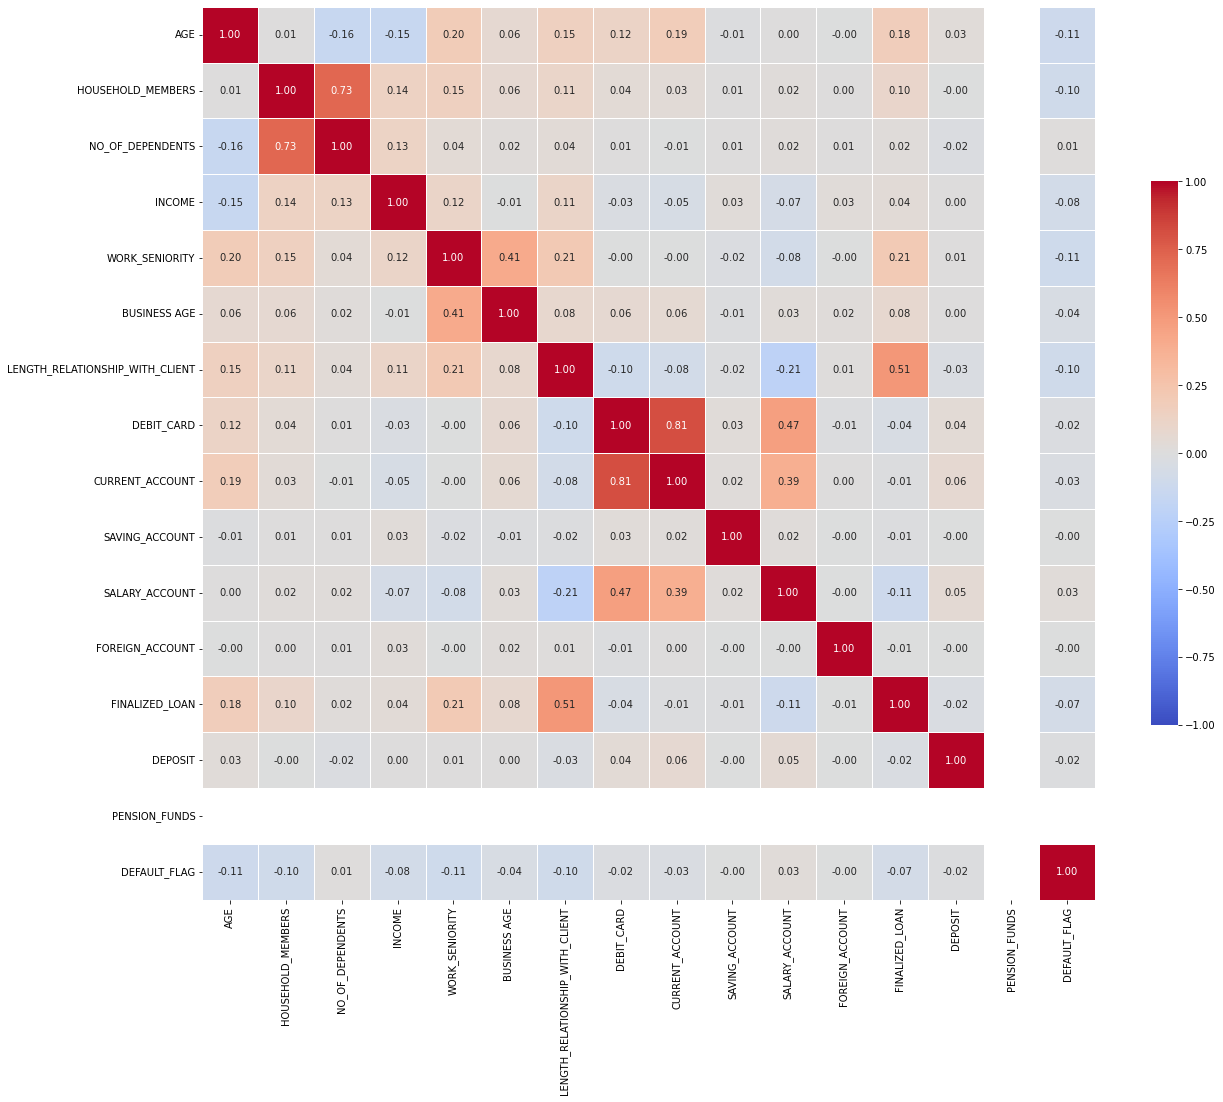

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()

# Feature Engineering (FE)

Wybór cech: Wybierzemy cechy, które mogą mieć istotny wpływ na wyniki pożyczek. Na podstawie opisu danych wybierzemy cechy finansowe, historię kredytową oraz inne cechy, które mogą być istotne.

Przekształcenie zmiennych kategorycznych: Zakodujemy zmienne kategoryczne za pomocą kodowania gorących jedynek (One-Hot Encoding), aby mogły być wykorzystane przez modele uczenia maszynowego.

Normalizacja zmiennych numerycznych: Normalizujemy zmienne numeryczne, aby mieć podobny zakres wartości.

Usunięcie niepotrzebnych kolumn: Kolumna 'PENSION_FUNDS' już została usunięte, ponieważ wydaje się nie mieć znaczącego wpływu na wynik pożyczek.

Badanie korelacji: Przeprowadzimy analizę korelacji między cechami, aby zidentyfikować silne związki między nimi.

In [85]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [86]:
df.head()
df.columns

Index(['PRODUCT', 'AGE', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION',
       'MARITAL_STATUS', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
       'WORK_SENIORITY', 'BUSINESS AGE', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO',
       'LENGTH_RELATIONSHIP_WITH_CLIENT', 'DEBIT_CARD', 'CURRENT_ACCOUNT',
       'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'FINALIZED_LOAN',
       'DEPOSIT', 'PENSION_FUNDS', 'DEFAULT_FLAG'],
      dtype='object')

### Wrzucenie nic nie wnoszącej kolumny

In [87]:
df = df.drop("PENSION_FUNDS", axis = 1)

# zmieniłam onehotencoder na get_dummies bo chyba jest to prostsze

### Kodowanie zmiennych kategorycznych za pomocą get_dummies z biblioteki Pandas

In [88]:
df_dummies = pd.get_dummies(df, columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'ECONOMIC_SECTOR'])
df_dummies.head(20)
df_dummies.columns
# categorical_features = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS']
# encoder = OneHotEncoder()
# ct = ColumnTransformer(transformers=[('encoder', encoder, categorical_features)], remainder='passthrough')
# selected_features_encoded = ct.fit_transform(selected_features)

Index(['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
       'WORK_SENIORITY', 'BUSINESS AGE', 'EMPLOYEE_NO',
       'LENGTH_RELATIONSHIP_WITH_CLIENT', 'DEBIT_CARD', 'CURRENT_ACCOUNT',
       'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'FINALIZED_LOAN',
       'DEPOSIT', 'DEFAULT_FLAG', 'PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C',
       'PRODUCT_D', 'PRODUCT_E', 'PRODUCT_F', 'AREA_County capital',
       'AREA_Missing', 'AREA_Rural area', 'AREA_Urban area',
       'RESIDENTIAL_PLACE_Living with family', 'RESIDENTIAL_PLACE_Other',
       'RESIDENTIAL_PLACE_Owner with mortgage',
       'RESIDENTIAL_PLACE_Owner without mortgage', 'RESIDENTIAL_PLACE_Rental',
       'EDUCATION_College', 'EDUCATION_Highschool', 'EDUCATION_Middle school',
       'EDUCATION_Missing', 'EDUCATION_Other',
       'EDUCATION_Post secondary school', 'EDUCATION_Post-graduate',
       'EDUCATION_Primary school', 'EDUCATION_University',
       'EDUCATION_Vocational school', 'MARITAL_STATUS_divorced',
 

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Użycie IterativeImputer, który modeluje każdą cechę z brakującymi danymi jako funkcję innych cech
imp = IterativeImputer(max_iter=10, random_state=0)

# Stosowanie imputera
df_imputed = imp.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)


ValueError: could not convert string to float: 'C'

In [42]:
# Pobranie nazw zakodowanych cech kategorycznych
# encoded_feature_names = []
# for i, feature in enumerate(categorical_features):
#     categories = df[feature].unique()
#     encoded_feature_names.extend([f"{feature}_{category}" for category in categories])
    
# print(encoded_feature_names)    

['PRODUCT_C', 'PRODUCT_F', 'PRODUCT_B', 'PRODUCT_E', 'PRODUCT_D', 'PRODUCT_A', 'AREA_County capital', 'AREA_Urban area', 'AREA_Rural area', 'AREA_Missing', 'RESIDENTIAL_PLACE_Owner without mortgage', 'RESIDENTIAL_PLACE_Living with family', 'RESIDENTIAL_PLACE_Owner with mortgage', 'RESIDENTIAL_PLACE_Rental', 'RESIDENTIAL_PLACE_Other', 'EDUCATION_University', 'EDUCATION_Post-graduate', 'EDUCATION_Highschool', 'EDUCATION_Missing', 'EDUCATION_Post secondary school', 'EDUCATION_Other', 'EDUCATION_College', 'EDUCATION_Vocational school', 'EDUCATION_Middle school', 'EDUCATION_Primary school', 'MARITAL_STATUS_married', 'MARITAL_STATUS_divorced', 'MARITAL_STATUS_single', 'MARITAL_STATUS_widow']


In [43]:
# # Pobranie nazw wszystkich cech
# all_feature_names = encoded_feature_names + ['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
#                                              'WORK_SENIORITY', 'LENGTH_RELATIONSHIP_WITH_CLIENT',
#                                              'FINALIZED_LOAN', 'DEPOSIT', 'DEBIT_CARD', 'CURRENT_ACCOUNT',
#                                              'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEFAULT_FLAG']

In [44]:
# # Konwersja do DataFrame
# selected_features_encoded_df = pd.DataFrame(selected_features_encoded, columns=all_feature_names)
# selected_features_encoded_df.head()

ValueError: Shape of passed values is (15097, 46), indices imply (15097, 43)

In [85]:
count_1 = df_dummies['DEFAULT_FLAG'].value_counts()[1]
print("Liczba wystąpień wartości 1 w kolumnie DEFAULT_FLAG:", count_1)


Liczba wystąpień wartości 1 w kolumnie DEFAULT_FLAG: 864


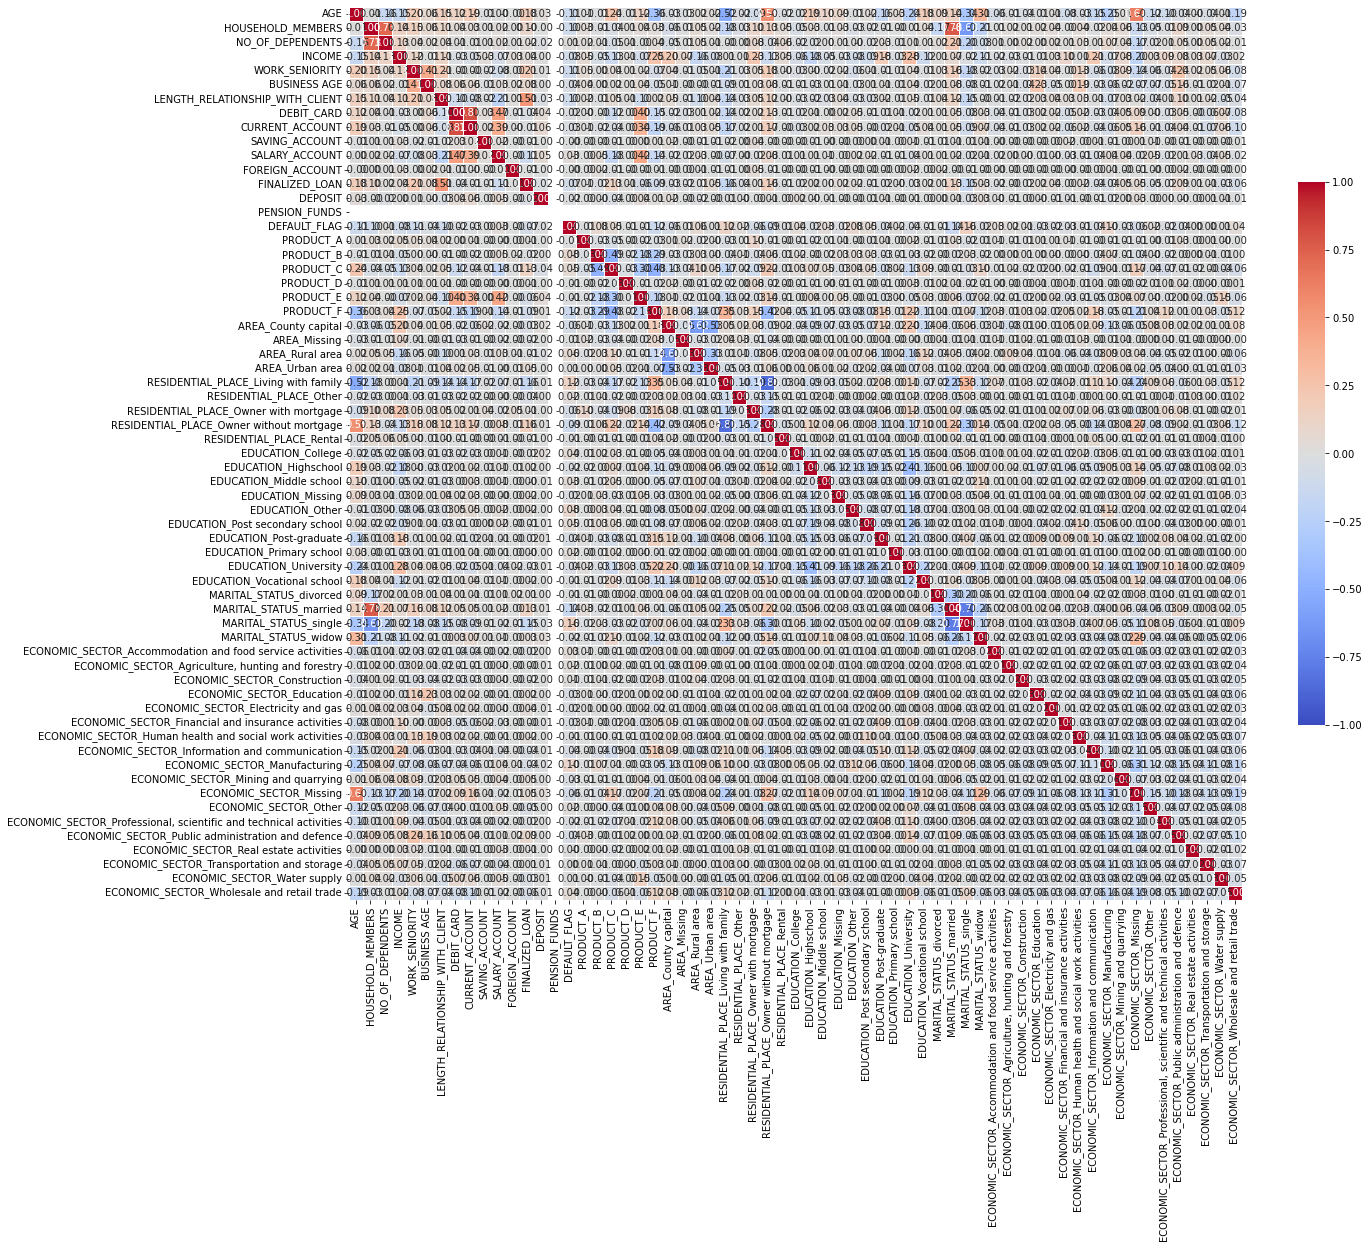

In [86]:
# Badanie korelacji
correlation_matrix = df_dummies.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

Tworzenie nowych cech: Możemy utworzyć nowe cechy na podstawie już istniejących, np. stosunek długości związku z klientem do długości pracy, czy wskaźnik zadłużenia (np. stosunek przychodu do liczby członków w gospodarstwie domowym).

Przekształcenie cech numerycznych: Przekształcenie cech za pomocą funkcji matematycznych, np. zastosowanie logarytmu lub pierwiastka kwadratowego, może pomóc w poprawie ich rozkładu i zwiększeniu wydajności modelu.

Normalizacja danych: Normalizacja cech numerycznych, aby miały średnią równą 0 i wariancję równą 1, może pomóc w zwiększeniu wydajności niektórych algorytmów uczenia maszynowego.

Usunięcie obserwacji odstających: Usunięcie obserwacji, które znacząco różnią się od reszty danych, może poprawić wydajność modelu.

Wybór istotnych cech: Przeprowadzenie analizy cech za pomocą metod jak analiza głównych składowych (PCA) lub testy statystyczne, aby zidentyfikować istotne cechy dla predykcji.

In [219]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [220]:
# Tworzenie nowych cech
selected_features_encoded_df['RELATIONSHIP_WORK_RATIO'] = selected_features_encoded_df['LENGTH_RELATIONSHIP_WITH_CLIENT'] / selected_features_encoded_df['WORK_SENIORITY']
selected_features_encoded_df['DEBT_INCOME_RATIO'] = selected_features_encoded_df['INCOME'] / selected_features_encoded_df['HOUSEHOLD_MEMBERS']

In [221]:
# Przekształcenie cech numerycznych
selected_features_encoded_df['LOG_INCOME'] = np.log1p(selected_features_encoded_df['INCOME'])
selected_features_encoded_df['SQRT_AGE'] = np.sqrt(selected_features_encoded_df['AGE'])

In [222]:
# Normalizacja danych
scaler = RobustScaler()
selected_features_encoded_df[['INCOME', 'AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS']] = scaler.fit_transform(selected_features_encoded_df[['INCOME', 'AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS']])

In [223]:
# Usunięcie obserwacji odstających
# selected_features_encoded_df = selected_features_encoded_df[selected_features_encoded_df['INCOME'] < 10]

In [224]:
# Wybór istotnych cech
pca = PCA(n_components=10)
selected_features_pca = pca.fit_transform(selected_features_encoded_df.drop(columns=['DEFAULT_FLAG']))

In [225]:
# Aktualizacja nazw cech po zastosowaniu PCA
pca_feature_names = [f'PCA_{i}' for i in range(selected_features_pca.shape[1])]
selected_features_pca_df = pd.DataFrame(selected_features_pca, columns=pca_feature_names)

In [226]:
# Połączenie zbiórów danych po zastosowaniu PCA
selected_features_encoded_df = pd.concat([selected_features_encoded_df.reset_index(drop=True), selected_features_pca_df.reset_index(drop=True)], axis=1)

In [227]:
# Aktualizacja listy nazw cech
all_feature_names = list(selected_features_encoded_df.columns)

In [228]:
# Podział na zbiór treningowy i testowy
X = selected_features_encoded_df.drop(columns=['DEFAULT_FLAG'])
y = selected_features_encoded_df['DEFAULT_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Wybrane cechy dla wizualizacji
selected_features_visualization = ['AGE', 'INCOME', 'HOUSEHOLD_MEMBERS', 'LENGTH_RELATIONSHIP_WITH_CLIENT', 'FINALIZED_LOAN']

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Definicja cech numerycznych i kategorycznych
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline zawierający przetwarzanie i klasyfikator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Wybór 10 najlepszych cech
    ('pca', PCA(n_components=5)),  # Redukcja wymiarowości do 5 komponentów PCA
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Klasyfikator RandomForest z ograniczeniem głębokości drzew
])

# Dopasowanie modelu
pipeline.fit(X_train, y_train)

# Ocena modelu
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")




Train Accuracy: 0.95
Test Accuracy: 0.95


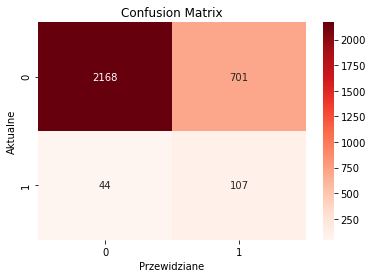

In [232]:
#confusion matrix
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Przewidziane')
plt.ylabel('Aktualne')
plt.title('Confusion Matrix')
plt.show()

# Modelowanie